<a href="https://colab.research.google.com/github/beverast/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/EIA_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EIA Data Analysis

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
# Read in CSV 
us_net_wind_gen = pd.read_csv('./data/Net_generation_wind_United_States_all_sectors_monthly.csv', lineterminator=',')

In [0]:
# Split column with relevant data into 'thousand_megawatt_hrs' and 'month' columns
us_net_wind_gen['thousand_megawatt_hrs'], us_net_wind_gen['month'] = us_net_wind_gen['Net generation wind United States all sectors monthly\nhttps://www.eia.gov/opendata/qb.php?sdid=ELEC.GEN.WND-US-99.M\n12:23:19 GMT-0400 (Eastern Daylight Time)\nSource: U.S. Energy Information Administration\nMonth'].str.split('\n', 1).str

In [0]:
# Drop column with unusable data and very long name
us_net_wind_gen = us_net_wind_gen.drop(labels='Net generation wind United States all sectors monthly\nhttps://www.eia.gov/opendata/qb.php?sdid=ELEC.GEN.WND-US-99.M\n12:23:19 GMT-0400 (Eastern Daylight Time)\nSource: U.S. Energy Information Administration\nMonth', axis=1)

In [0]:
# Inspect the dataframe
us_net_wind_gen.shape

(218, 2)

In [0]:
us_net_wind_gen.head()

,thousand_megawatt_hrs,month
0,Series ID: ELEC.GEN.WND-US-99.M thousand megaw...,Jan 2019
1,25164.53476,Dec 2018
2,24824.68328,Nov 2018
3,22456.95089,Oct 2018
4,21146.83581,Sep 2018


In [0]:
us_net_wind_gen.tail()

,thousand_megawatt_hrs,month
213,635.029,Apr 2001
214,684.695,Mar 2001
215,532.12,Feb 2001
216,431.242,Jan 2001
217,389.25,NaN


In [0]:
# Drop first and last observation
us_net_wind_gen = us_net_wind_gen.drop([0,217])

In [0]:
us_net_wind_gen.shape

(216, 2)

In [0]:
us_net_wind_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 1 to 216
Data columns (total 2 columns):
thousand_megawatt_hrs    216 non-null object
month                    216 non-null object
dtypes: object(2)
memory usage: 5.1+ KB


In [0]:
# Convert dtypes
us_net_wind_gen['thousand_megawatt_hrs'] = us_net_wind_gen['thousand_megawatt_hrs'].astype('float')
us_net_wind_gen['month'] = pd.to_datetime(us_net_wind_gen['month'])
us_net_wind_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 1 to 216
Data columns (total 2 columns):
thousand_megawatt_hrs    216 non-null float64
month                    216 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.1 KB


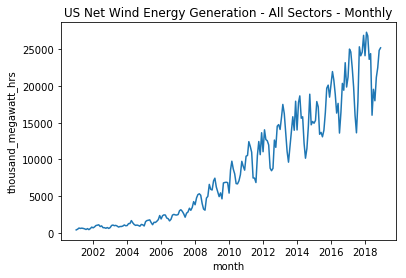

In [0]:
sns.lineplot(x='month', y='thousand_megawatt_hrs', data=us_net_wind_gen)
plt.title('US Net Wind Energy Generation - All Sectors - Monthly');

In [0]:
# Net generation all energies monthly
tx_net_wind_gen = pd.read_csv('./data/Net_generation_wind_Texas_all_sectors_monthly.csv', lineterminator=',')
tx_net_wind_gen.columns

Index(['Net generation wind Texas all sectors monthly\nhttps://www.eia.gov/opendata/qb.php?category=14&sdid=ELEC.GEN.WND-TX-99.M\n14:02:26 GMT-0400 (Eastern Daylight Time)\nSource: U.S. Energy Information Administration\nMonth'], dtype='object')

In [0]:
tx_net_wind_gen['thousand_megawatt_hrs'], tx_net_wind_gen['month'] = tx_net_wind_gen['Net generation wind Texas all sectors monthly\nhttps://www.eia.gov/opendata/qb.php?category=14&sdid=ELEC.GEN.WND-TX-99.M\n14:02:26 GMT-0400 (Eastern Daylight Time)\nSource: U.S. Energy Information Administration\nMonth'].str.split('\n', 1).str

In [0]:
# Same cleaning process as above
tx_net_wind_gen = tx_net_wind_gen.drop(labels='Net generation wind Texas all sectors monthly\nhttps://www.eia.gov/opendata/qb.php?category=14&sdid=ELEC.GEN.WND-TX-99.M\n14:02:26 GMT-0400 (Eastern Daylight Time)\nSource: U.S. Energy Information Administration\nMonth', axis=1)
tx_net_wind_gen = tx_net_wind_gen.drop([0,217])
tx_net_wind_gen['thousand_megawatt_hrs'] = tx_net_wind_gen['thousand_megawatt_hrs'].astype('float')
tx_net_wind_gen['month'] = pd.to_datetime(tx_net_wind_gen['month'])

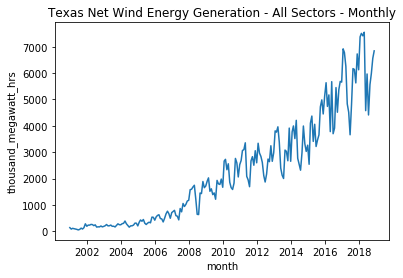

In [0]:
sns.lineplot(x='month', y='thousand_megawatt_hrs', data=tx_net_wind_gen)
plt.title('Texas Net Wind Energy Generation - All Sectors - Monthly');

In [0]:
tx_reversed = tx_net_wind_gen[::-1]
us_reversed = us_net_wind_gen[::-1]

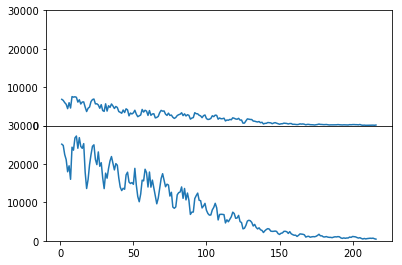

In [0]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(0, 30000))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(0, 30000))


ax1.plot(tx_reversed);
ax2.plot(us_reversed);

### Net generation of Natural Gas for All Sectors Jan. 2019

![Net generation: Natural gas: All Sectors: Jan 2019](./data/chart.png)

In [0]:
Get wind gen, avg elec retail price, etc

# Average Retail Price of Electricity (in US cents)

![Average Retail Electricity Price](./data/avg_retail_elec.png)

# Fossil Fuel Stock for Coal in January 2019

Texas has 6,730 tons of coal stock- the most in the US.

![Fossil Fuel Stocks for Coal in January 2019](./data/fossil_fuel_stock_coal_jan2019.png)